In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/10s7CNwgy8pJoSrbLFR3DAn_DffPIpdHqPhYzfP4eN_A/export?format=csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 19, 2023","1,807.38","1,800.95","1,808.94","1,796.99",315.13K,0.35%
1,"May 18, 2023","1,800.99","1,822.12","1,831.51","1,774.77",311.24K,-1.14%
2,"May 17, 2023","1,821.73","1,823.98","1,834.44","1,785.78",376.26K,-0.12%
3,"May 16, 2023","1,823.98","1,817.11","1,830.01","1,797.60",325.77K,0.38%
4,"May 15, 2023","1,817.11","1,799.36","1,845.27","1,786.61",405.84K,0.99%
...,...,...,...,...,...,...,...
2622,"Mar 14, 2016",12.5,15.07,15.07,11.4,92.18K,-17.05%
2623,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
2624,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
2625,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 0 to 2618
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2612 non-null   datetime64[ns]
 1   Price     2612 non-null   float64       
 2   Open      2612 non-null   float64       
 3   High      2612 non-null   float64       
 4   Low       2612 non-null   float64       
 5   Vol.      2612 non-null   object        
 6   Change %  2612 non-null   float64       
 7   Year      2612 non-null   int64         
 8   Month     2612 non-null   int64         
 9   Day       2612 non-null   int64         
 10  year      2612 non-null   int64         
 11  month     2612 non-null   int64         
 12  day       2612 non-null   int64         
 13  weekday   2612 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(7), object(1)
memory usage: 370.6+ KB


In [ ]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

**DATA CLEANING**

volume 

In [ ]:
df.drop(df[df['Vol.']=='-'].index, inplace=True)

In [ ]:
EV=df['Vol.']
E=[]
for x in EV:
    if x.endswith("B"):
        x=x[:-1]
        x=float(x)
        x=x*1000000000
        E.append(x)
    elif x.endswith("K"):
        x=x[:-1]
        x=float(x)
        x=x*1000
        E.append(x)
    elif x.endswith("M"):
        x=x[:-1]
        x=float(x)
        x=x*1000000
        E.append(x)

Change

In [ ]:
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 19, 2023","1,807.38","1,800.95","1,808.94","1,796.99",315.13K,0.35
1,"May 18, 2023","1,800.99","1,822.12","1,831.51","1,774.77",311.24K,-1.14
2,"May 17, 2023","1,821.73","1,823.98","1,834.44","1,785.78",376.26K,-0.12
3,"May 16, 2023","1,823.98","1,817.11","1,830.01","1,797.60",325.77K,0.38
4,"May 15, 2023","1,817.11","1,799.36","1,845.27","1,786.61",405.84K,0.99
...,...,...,...,...,...,...,...
2622,"Mar 14, 2016",12.5,15.07,15.07,11.4,92.18K,-17.05
2623,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64
2624,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12
2625,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70


Removel of commas from a number (countinous values)

In [ ]:
df["Price"]=df["Price"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
df["Open"]=df["Open"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
df["High"]=df["High"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
df["Low"]=df["Low"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")

Date

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

creating 3 new columns describlibf DATE

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

rearranging the roww starting from 10-3-2016

In [ ]:
df=df.loc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day
0,2016-03-10,11.75,11.20,11.85,11.07,0.00K,4.91,2016,3,10
1,2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70,2016,3,11
2,2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12,2016,3,12
3,2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64,2016,3,13
4,2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05,2016,3,14
...,...,...,...,...,...,...,...,...,...,...
2614,2023-05-15,1817.11,1799.36,1845.27,1786.61,405.84K,0.99,2023,5,15
2615,2023-05-16,1823.98,1817.11,1830.01,1797.60,325.77K,0.38,2023,5,16
2616,2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,2023,5,17
2617,2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,2023,5,18


In [ ]:
df = df.dropna()

PLoting the price 📈

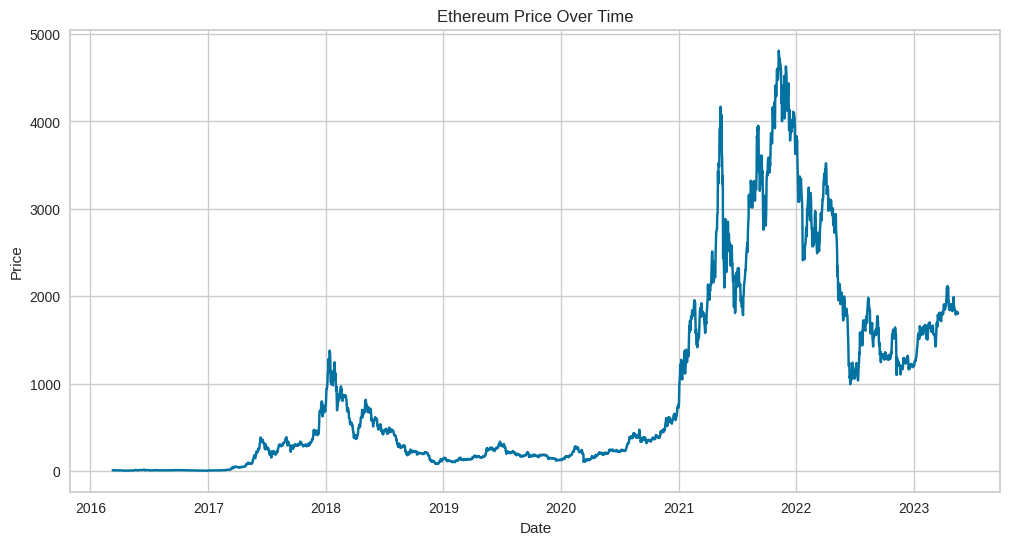

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=df)
plt.title('Ethereum Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday

Selecting and Spliting the model

20% test data and 80%train data
for model prediction

In [ ]:
X = df[['year', 'month', 'day', 'weekday']]
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Algorithem to choose the best model to predit the data 🦸‍♂️

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.regression import *
exp_name = setup(data=df[['year', 'month', 'day', 'weekday','Price']],target="Price")
best_model = compare_models()

,Description,Value
0,Session id,561
1,Target,Price
2,Target type,Regression
3,Original data shape,"(2612, 5)"
4,Transformed data shape,"(2612, 5)"
5,Transformed train set shape,"(1828, 5)"
6,Transformed test set shape,"(784, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,34.0342,4716.7753,68.2647,0.9962,0.0541,0.0390,0.4950
rf,Random Forest Regressor,40.9409,7042.7473,82.9239,0.9944,0.0695,0.0486,0.7420
xgboost,Extreme Gradient Boosting,56.8203,9158.4221,95.0174,0.9927,0.3540,0.2561,0.2390
dt,Decision Tree Regressor,44.3386,10884.8504,100.4504,0.9913,0.0770,0.0493,0.0760
lightgbm,Light Gradient Boosting Machine,68.8340,13893.0018,117.3418,0.9889,0.3688,0.3024,0.1920
gbr,Gradient Boosting Regressor,123.1932,41029.4447,201.7097,0.9673,0.5963,0.7330,0.3930
ada,AdaBoost Regressor,231.7203,119040.5320,344.2691,0.9051,0.6567,0.9272,0.1100
knn,K Neighbors Regressor,548.1125,669082.1562,817.3166,0.4668,1.2478,3.2311,0.0590
br,Bayesian Ridge,622.6329,671514.0603,818.9197,0.4657,1.4554,4.3951,0.0540
lar,Least Angle Regression,623.4796,671514.9119,818.9224,0.4657,1.4586,4.4355,0.0550


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Setting the value to be predicted

In [ ]:
import datetime

target_date = datetime.datetime(2023, 5, 21)
target_data = pd.DataFrame({'Date': [target_date]})
target_data['year'] = target_data['Date'].dt.year
target_data['month'] = target_data['Date'].dt.month
target_data['day'] = target_data['Date'].dt.day
target_data['weekday'] = target_data['Date'].dt.weekday

# Append 5 more rows to the dataset
new_rows = [
    {'Date': datetime.datetime(2023, 5, 22), 'year': 2023, 'month': 5, 'day': 22, 'weekday': 0},
    {'Date': datetime.datetime(2023, 5, 23), 'year': 2023, 'month': 5, 'day': 23, 'weekday': 1},
    {'Date': datetime.datetime(2023, 5, 24), 'year': 2023, 'month': 5, 'day': 24, 'weekday': 2},
    {'Date': datetime.datetime(2023, 5, 25), 'year': 2023, 'month': 5, 'day': 25, 'weekday': 3},
    {'Date': datetime.datetime(2023, 5, 26), 'year': 2023, 'month': 5, 'day': 26, 'weekday': 4}
]

target_data = target_data.append(new_rows, ignore_index=True)

print(target_data)


        Date  year  month  day  weekday
0 2023-05-21  2023      5   21        6
1 2023-05-22  2023      5   22        0
2 2023-05-23  2023      5   23        1
3 2023-05-24  2023      5   24        2
4 2023-05-25  2023      5   25        3
5 2023-05-26  2023      5   26        4


Date *selection*

In [ ]:
df_2023 = df[(df['Date'].dt.year == 2023)  & (df['Date'].dt.month == 5)]

Models

1)LinearRegression



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_score = linear_reg.score(X_test, y_test)
print(f"Linear Regression Score: {linear_reg_score}")

Linear Regression Score: 0.48531590848812645


In [ ]:
linear_reg_prediction = linear_reg.predict(target_data[['year', 'month', 'day', 'weekday']])
print("Linear Regression Prediction:", linear_reg_prediction)

Linear Regression Prediction: [2205.47210007 2261.47828147 2250.93584069 2240.39339991 2229.85095913
 2219.30851835]


Plot Result

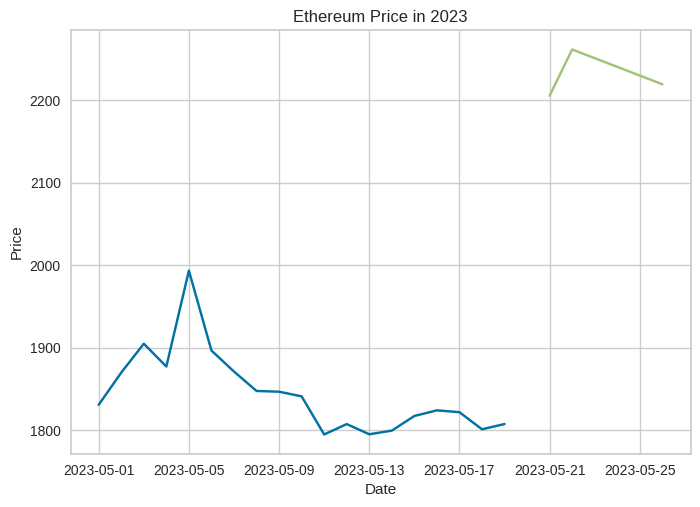

In [ ]:


# Plot the 'Price' column against the 'Date' column
plt.plot(df_2023['Date'], df_2023['Price'])
plt.plot(target_data['Date'],linear_reg_prediction)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum Price in 2023')
plt.show()

In [ ]:
linear_reg.coef_

array([367.54775231,  21.07767949,  -1.03549475,  -9.50694603])

In [ ]:
linear_reg.intercept_

-741370.2321569893

2)DecisionTreeRegressor

In [ ]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg_score = dt_reg.score(X_test, y_test)
print(f"Decision Tree Regression Score: {dt_reg_score}")

Decision Tree Regression Score: 0.9957652135274083


In [ ]:
dt_reg_prediction = dt_reg.predict(target_data[['year', 'month', 'day', 'weekday']])
print("Decision Tree Regression Prediction:", dt_reg_prediction)

Decision Tree Regression Prediction: [1800.99 1817.11 1821.73 1821.73 1800.99 1800.99]


Plot Result

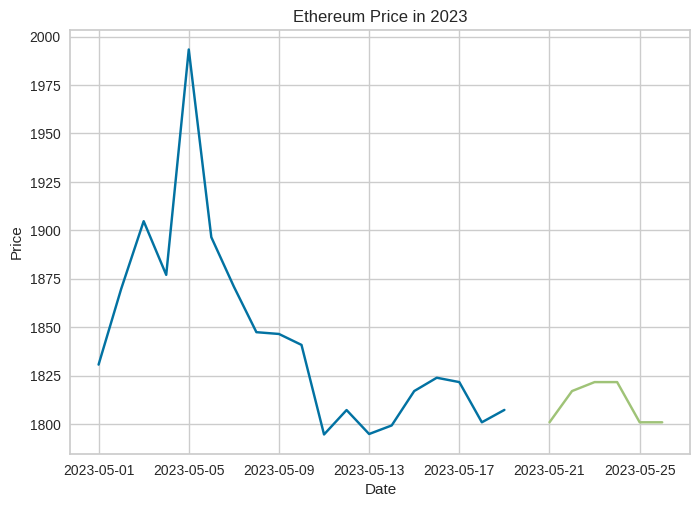

In [ ]:
# Plot the 'Price' column against the 'Date' column
plt.plot(df_2023['Date'], df_2023['Price'])
plt.plot(target_data['Date'],dt_reg_prediction)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum Price in 2023')
plt.show()

3)RandomForestRegressor

In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RAM_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RAM_regressor.fit(X_train, y_train)
RAM_regressor_score = RAM_regressor.score(X_test, y_test)
print(f"RandomForestRegressor Score: {RAM_regressor_score}")

RandomForestRegressor Score: 0.9965880475094776


In [ ]:
RAM_regressor_prediction = RAM_regressor.predict(target_data[['year', 'month', 'day', 'weekday']])
print("RandomForestRegressor Prediction:", RAM_regressor_prediction)

RandomForestRegressor Prediction: [1818.02034 1836.63155 1831.07743 1828.03557 1817.99317 1823.18349]


Plot Result

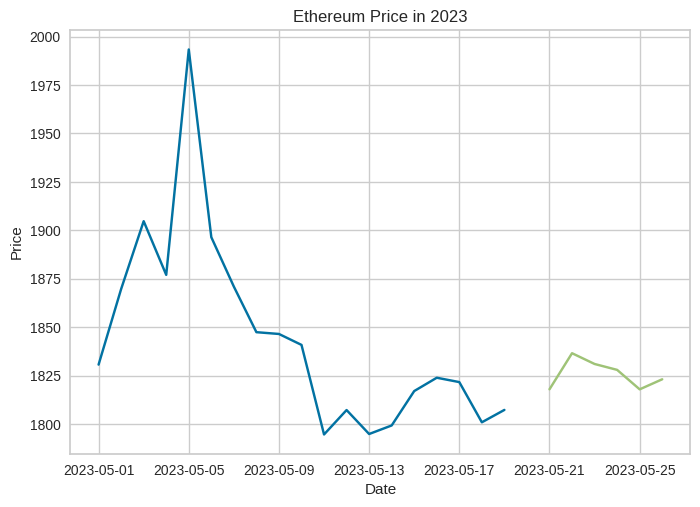

In [ ]:
# Plot the 'Price' column against the 'Date' column
plt.plot(df_2023['Date'], df_2023['Price'])
plt.plot(target_data['Date'],RAM_regressor_prediction)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum Price in 2023')
plt.show()

PLot result

3)ExtraTreesRegressor

In [ ]:
#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
Et_reg=ExtraTreesRegressor()
Et_reg.fit(X_train, y_train)
Et_reg_score=Et_reg.score(X_train, y_train)
print(f"Et_reg Regressor Score: {Et_reg_score}")

Et_reg Regressor Score: 0.9999999999997998


In [ ]:
Et_reg_prediction = RAM_regressor.predict(target_data[['year', 'month', 'day', 'weekday']])
print("Linear Regression Prediction:", Et_reg_prediction)

Linear Regression Prediction: [1818.02034 1836.63155 1831.07743 1828.03557 1817.99317 1823.18349]


PLot result

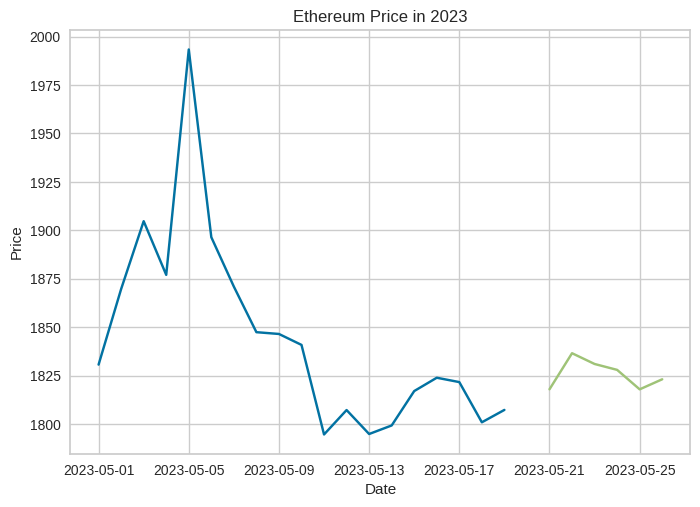

In [ ]:
plt.plot(df_2023['Date'], df_2023['Price'])
plt.plot(target_data['Date'],Et_reg_prediction)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum Price in 2023')
plt.show()

4)KNeighborsRegressor

In [ ]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_score=knn.score(X_train, y_train)
print(f"Extra Trees Regressor Score: {knn_score}")

Extra Trees Regressor Score: 0.6359044893461854


In [ ]:
knn_prediction = knn.predict(target_data[['year', 'month', 'day', 'weekday']])
print("Linear Regression Prediction:", knn_prediction)

Linear Regression Prediction: [2204.282 1957.414 2139.246 1754.856 1738.672 1706.868]


PLot result

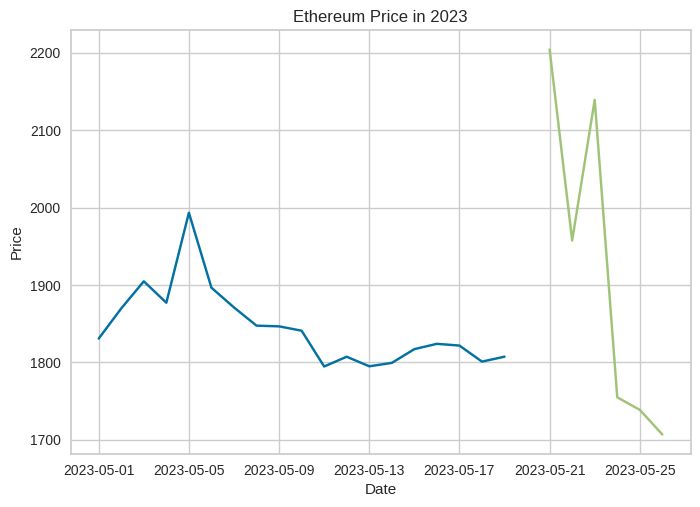

In [ ]:
plt.plot(df_2023['Date'], df_2023['Price'])
plt.plot(target_data['Date'],knn_prediction)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum Price in 2023')
plt.show()